<a href="https://colab.research.google.com/github/nurdalilahanan/Data-Science-Project/blob/main/P167239_Week7_DataLoading_Storage_20251122.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Week 07: <font color='red'>Data Loading and Storage</font>**

#### **For details of this Topic (Data Loading, Storage, and File Formats), please refer to the textbook: "Python for Data Analysis" by Wes McKinney: https://wesmckinney.com/book/**

#### **Mount to Google Drive**

In [ ]:
# Mount to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Import Pandas and NumPy library**


In [ ]:
# Import the library
import pandas as pd
import numpy as np

## **Reading in and Writing Data in Text Format:** <font color='red'>\*.csv*</font> or <font color='red'>\*.txt</font> **format**

# **csv -> comma separated value**

In [ ]:
# Download the ex1.csv file here: https://tinyurl.com/yheh3evw
# Upload ex1.csv to Google Drive
from google.colab import files
files.upload()

Saving ex1.csv to ex1.csv


{'ex1.csv': b'a,b,c,d,message\n1,2,3,4,hello\n5,6,7,8,world\n9,10,11,12,foo'}

## Shell Command
- A shell command is an **instruction** given to the computer's **operating system (OS)** through a command-line interpreter
- often called a **'shell'**.

In [ ]:
# Check where is the ex1.csv file being uploaded
# pwd -> "print working directory"
!pwd

/content


In [ ]:
# read files sequentially and print their contents
# cat() function - read and output the ex1.csv content
# cat() is called 'concatenate' -> to display the contents of a file
# the "!" is to run a shell command
!cat /content/ex1.csv

a,b,c,d,message
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo

In [ ]:
# Read the file using the read_table() function
# Without specifying the delimter
# There is an error message here -> the data is not in the dataframe format
df = pd.read_table('/content/ex1.csv')
df

,"a,b,c,d,message"
0,"1,2,3,4,hello"
1,"5,6,7,8,world"
2,"9,10,11,12,foo"


In [ ]:
# Specified the delimiter: csv -> ','
pd.read_table('/content/ex1.csv', sep = ',')

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


# **Reading data directly from github**

In [ ]:
# Get it from this URL: https://tinyurl.com/yc39yfdj
# Must be in RAW format
url = "https://tinyurl.com/bddnmxb3"

# Read using the read_csv() function
df = pd.read_csv(url)
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


# **A file without header**

In [ ]:
# Download ex2.csv raw data directly from GitHub
# Using this URL: https://tinyurl.com/y4xd66my
# ex2.csv does not have header
# Python will assign column name automatically
url = 'https://tinyurl.com/y4xd66my'
df = pd.read_csv(url, header=None)
df

,0,1,2,3,4
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [ ]:
# Specify the column names ourself
# Use this URL: https://tinyurl.com/y4xd66my
pd.read_csv(url, names=['UKM', 'fruit', 'num_car', 'pet', 'keywords'])

,UKM,fruit,num_car,pet,keywords
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [ ]:
# Set which specific column as the index
# "names" -> expecting a list of strings representing the desired column names
# index_col -> the column used as the index (row labels) for the DataFrame
# Use this URL: https://tinyurl.com/y4xd66my
names=['a', 'book', 'cat', 'donkey', 'elephant']
pd.read_csv(url, names = names, index_col = 'book')

,a,cat,donkey,elephant
book,,,,
2,1,3,4,hello
6,5,7,8,world
10,9,11,12,foo


### **Table without a fixed delimiter**
- **sep=r'\s+'** denote one or more whitespace characters (**spaces, tabs, newlines**)
- `r` -> **raw string**

In [ ]:
res = pd.read_table('https://tinyurl.com/2e2y7jh2',
                    sep=r'\s+')
res

,A,B,C
aaa,-0.264438,-1.026059,-0.619500
bbb,0.927272,0.302904,-0.032399
ccc,-0.264273,-0.386314,-0.217601
ddd,-0.871858,-0.348382,1.100491


### **Files with comments embedded**

In [ ]:
# Load ex4.csv here: https://tinyurl.com/mr4ex879
# Using skip rows as parser function
pd.read_table('https://tinyurl.com/mr4ex879',
              skiprows = [0, 2, 3], sep = ',')

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [ ]:
# Another method: Use the "comment" function
# URL: https://bit.ly/3HXjXUR
pd.read_table('https://tinyurl.com/mr4ex879',
              comment = '#', sep = ',')

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


# **Dealing with files with <font color='red'>missing data</font>**

In [ ]:
# Files with missing values
# Download ex5.csv here: https://tinyurl.com/yc4v35d6
# Handle missing values - NaN (Not a Number)
res = pd.read_csv('https://tinyurl.com/yc4v35d6', na_values=['NULL'])
res

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [ ]:
# Check the presence of null value - True of False
pd.isnull(res)

,something,a,b,c,d,message
0,False,False,False,False,False,True
1,False,False,False,True,False,False
2,False,False,False,False,False,False


## **Sentinels**
* serve as **placeholders for specific conditions** or **special values** within pandas data structures.
* <font color='red'>`Missing data`: `NaN`</font> is the most common sentinel, representing **missing or undefined values**.

In [ ]:
# Specified sentinels - unique placeholder values
# Get the raw data for ex5.csv here: https://tinyurl.com/yc4v35d6
print(res)
print("\n------------------------------------\n")

sentinels = {'message': ['foo'], 'something': ['two']}
pd.read_csv('https://tinyurl.com/yc4v35d6', na_values=sentinels)

  something  a   b     c   d message
0       one  1   2   3.0   4     NaN
1       two  5   6   NaN   8   world
2     three  9  10  11.0  12     foo

------------------------------------



,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,NaN,5,6,NaN,8,world
2,three,9,10,11.0,12,NaN


## **Reading Text Files in Pieces**
### When ***processing very large files***, we may want to read only a small piece of a file

In [ ]:
# Change pandas display settings to become more compact
# Setting the maximum number of rows to 8
pd.options.display.max_rows=20

In [ ]:
# Read a large csv file - display only six rows
# Download ex6.csv here: https://tinyurl.com/3dv6buw8
# pd.options.display.max_rows=6
res = pd.read_csv('https://tinyurl.com/3dv6buw8')
res

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q
...,...,...,...,...,...
9995,2.311896,-0.417070,-1.409599,-0.515821,L
9996,-0.479893,-0.650419,0.745152,-0.646038,E
9997,0.523331,0.787112,0.486066,1.093156,K
9998,-0.362559,0.598894,-1.843201,0.887292,G


In [ ]:
# Only display a small number of rows
pd.read_csv('https://tinyurl.com/3dv6buw8', nrows = 15)

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q
5,1.817480,0.742273,0.419395,-2.251035,Q
6,-0.776764,0.935518,-0.332872,-1.875641,U
7,-0.913135,1.530624,-0.572657,0.477252,K
8,0.358480,-0.497572,-0.367016,0.507702,S
9,-1.740877,-1.160417,-1.637830,2.172201,G


## **Write the data**

In [ ]:
# Read ex5.csv: https://tinyurl.com/yc4v35d6
dat = pd.read_csv('https://tinyurl.com/yc4v35d6')
dat

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [ ]:
# Write data
dat.to_csv('/content/drive/MyDrive/STQD6014_Data_Science/Example_Data/Dalila.csv')

In [ ]:
# Display output of the written file
!cat /content/drive/MyDrive/STQD6014_Data_Science/Example_Data/Dalila.csv

,something,a,b,c,d,message
0,one,1,2,3.0,4,
1,two,5,6,,8,world
2,three,9,10,11.0,12,foo


### **Working with Other Delimited Formats**

In [ ]:
# Other delimiters: using a pipe "|" or "@" or "^"
# sys.stdout - prints the out to the console instead of writing
import sys
dat.to_csv(sys.stdout, sep='|')

|something|a|b|c|d|message
0|one|1|2|3.0|4|
1|two|5|6||8|world
2|three|9|10|11.0|12|foo


In [ ]:
# Other delimiters: using a pipe "|" or "@" or "^"
# sys.stdout - prints the out to the console instead of writing
import sys
dat.to_csv(sys.stdout, sep='%')

%something%a%b%c%d%message
0%one%1%2%3.0%4%
1%two%5%6%%8%world
2%three%9%10%11.0%12%foo


In [ ]:
# Fill missing data with some string representation
# na_rep: missing data representation
dat.to_csv(sys.stdout, na_rep='@')

,something,a,b,c,d,message
0,one,1,2,3.0,4,@
1,two,5,6,@,8,world
2,three,9,10,11.0,12,foo


In [ ]:
# Fill missing data with some string representation
# na_rep: missing data representation
dat.to_csv(sys.stdout, na_rep='?')

,something,a,b,c,d,message
0,one,1,2,3.0,4,?
1,two,5,6,?,8,world
2,three,9,10,11.0,12,foo


In [ ]:
# Disable row and column label
dat.to_csv(sys.stdout, index = False, header = False)

one,1,2,3.0,4,
two,5,6,,8,world
three,9,10,11.0,12,foo


In [ ]:
# Write subset of the dataframe: a, b, c
print(dat)
print("\n------------------------------------\n")

dat.to_csv(sys.stdout, index = False, columns = ['a', 'b', 'c'])

  something  a   b     c   d message
0       one  1   2   3.0   4     NaN
1       two  5   6   NaN   8   world
2     three  9  10  11.0  12     foo

------------------------------------

a,b,c
1,2,3.0
5,6,
9,10,11.0


### **Pandas Series is a one-dimensional labeled array**
* the associated array of labels is called the **index**
* capable of holding data of any type
    * <font color='red'>***integer, string, float, python objects***</font>, etc

In [ ]:
# By default, international accepted date format: YYYY-MM-DD
dates = pd.date_range('22/11/2025', periods = 7)
dates

DatetimeIndex(['2025-11-22', '2025-11-23', '2025-11-24', '2025-11-25',
               '2025-11-26', '2025-11-27', '2025-11-28'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
# Pandas can incorporate NumPy function -> np.arange
# np.arange returned an array range instead of list
dates = pd.date_range('22/11/2025', periods = 7)
ts = pd.Series(np.arange(7), index = dates)

# Save it to your own folder
ts.to_csv('/content/drive/MyDrive/STQD6014_Data_Science/Example_Data/tseries01.csv')

### **Convert string to date format**

In [ ]:
# To specify the exact date format
date_string = '22/25/11'
date_format = '%d/%y/%m'

# Convert the date string to a datetime object
start_date = pd.to_datetime(date_string, format = date_format)

# Generate a date range with specified start date and periods
date_range = pd.date_range(start_date, periods = 7)

# Output the date range
print(date_range)

DatetimeIndex(['2025-11-22', '2025-11-23', '2025-11-24', '2025-11-25',
               '2025-11-26', '2025-11-27', '2025-11-28'],
              dtype='datetime64[ns]', freq='D')


In [ ]:
# To specify the exact date format
date_string = '22-25@11'
date_format = '%d-%y@%m'

# Convert the date string to a datetime object
start_date = pd.to_datetime(date_string, format = date_format)

# Generate a date range with specified start date and periods
date_range = pd.date_range(start_date, periods = 7)

# Output the date range
print(date_range)

DatetimeIndex(['2025-11-22', '2025-11-23', '2025-11-24', '2025-11-25',
               '2025-11-26', '2025-11-27', '2025-11-28'],
              dtype='datetime64[ns]', freq='D')


In [ ]:
# Starts November 22 (Sat), for seven periods; Week start on Wednesday
dates = pd.date_range('22/11/2025', periods = 7, freq = ('W-WED'))
dates

DatetimeIndex(['2025-11-26', '2025-12-03', '2025-12-10', '2025-12-17',
               '2025-12-24', '2025-12-31', '2026-01-07'],
              dtype='datetime64[ns]', freq='W-WED')

### **JSON Data format** - short for ***J***ava***S***cript ***O***bject ***N***otation
1. one of the standard formats for sending data by HTTP request between web
browsers and other applications
2. much more free-form data format than a tabular text form like CSV
3. basic types are objects (***dictionaries***), arrays (***lists***), strings, numbers, Booleans, and nulls.
4. <font color='red'>all of the ***keys*** in an object must be ***strings***</font>

In [ ]:
# Triple quote -> """ -> docstring
obj = """
{"name": "Wes",
  "cities_lived": ["Akron", "Nashville", "New York", "San Francisco"],
  "pet": null,
  "siblings": [{"name": "Scott", "age": 34, "hobbies": ["guitars", "soccer"]},
               {"name": "Katie", "age": 42, "hobbies": ["diving", "art"]}]
}
"""

In [ ]:
# Convert string to Python form named res
# 'res' would be a dictionary representing the parsed JSON data
# this case it is a library
import json
res = json.loads(obj)
res

{'name': 'Wes',
 'cities_lived': ['Akron', 'Nashville', 'New York', 'San Francisco'],
 'pet': None,
 'siblings': [{'name': 'Scott', 'age': 34, 'hobbies': ['guitars', 'soccer']},
  {'name': 'Katie', 'age': 42, 'hobbies': ['diving', 'art']}]}

In [ ]:
# Converts Python object back to JSON
json.dumps(res)

'{"name": "Wes", "cities_lived": ["Akron", "Nashville", "New York", "San Francisco"], "pet": null, "siblings": [{"name": "Scott", "age": 34, "hobbies": ["guitars", "soccer"]}, {"name": "Katie", "age": 42, "hobbies": ["diving", "art"]}]}'

In [ ]:
# Convert JSON object to DataFrame
siblings = pd.DataFrame(res["siblings"], columns = ['name', 'hobbies'])
siblings

,name,hobbies
0,Scott,"[guitars, soccer]"
1,Katie,"[diving, art]"


In [ ]:
# Extract the city information and display in a dataframe
pd.DataFrame(res["cities_lived"], columns = ['CityInfo'])

,CityInfo
0,Akron
1,Nashville
2,New York
3,San Francisco


### **HTML file format**
1. The pandas.read_html function by default searches for and attempts to parse all ***tabular data*** contained within ***\<table>*** tags.
2. The result is a ***list of DataFrame objects***

In [ ]:
# Download data here: https://tinyurl.com/msaka5pd
# The filename: fdic_failed_bank_list.html
# fdic -> Federal Deposit Insurance Corporation
# This is a list of banks which have failed since October 1, 2000.
# The output is a list containing these extracted tables (as DataFrames) -> []
tbls = pd.read_html('https://tinyurl.com/msaka5pd')
tbls

[                             Bank Name             City  ST   CERT  \
 0                          Allied Bank         Mulberry  AR     91   
 1         The Woodbury Banking Company         Woodbury  GA  11297   
 2               First CornerStone Bank  King of Prussia  PA  35312   
 3                   Trust Company Bank          Memphis  TN   9956   
 4           North Milwaukee State Bank        Milwaukee  WI  20364   
 ..                                 ...              ...  ..    ...   
 542                 Superior Bank, FSB         Hinsdale  IL  32646   
 543                Malta National Bank            Malta  OH   6629   
 544    First Alliance Bank & Trust Co.       Manchester  NH  34264   
 545  National State Bank of Metropolis       Metropolis  IL   3815   
 546                   Bank of Honolulu         Honolulu  HI  21029   
 
                    Acquiring Institution        Closing Date  \
 0                           Today's Bank  September 23, 2016   
 1              

In [ ]:
# Output the content of the table
failures = tbls[0]
failures

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Allied Bank,Mulberry,AR,91,Today's Bank,"September 23, 2016","November 17, 2016"
1,The Woodbury Banking Company,Woodbury,GA,11297,United Bank,"August 19, 2016","November 17, 2016"
2,First CornerStone Bank,King of Prussia,PA,35312,First-Citizens Bank & Trust Company,"May 6, 2016","September 6, 2016"
3,Trust Company Bank,Memphis,TN,9956,The Bank of Fayette County,"April 29, 2016","September 6, 2016"
4,North Milwaukee State Bank,Milwaukee,WI,20364,First-Citizens Bank & Trust Company,"March 11, 2016","June 16, 2016"
...,...,...,...,...,...,...,...
542,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB","July 27, 2001","August 19, 2014"
543,Malta National Bank,Malta,OH,6629,North Valley Bank,"May 3, 2001","November 18, 2002"
544,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,"February 2, 2001","February 18, 2003"
545,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,"December 14, 2000","March 17, 2005"


In [ ]:
# Perform data cleaning and analysis
# Extract data from "Closing Date" column
# Convert to standard date accepted internationally
close_timestamps = pd.to_datetime(failures["Closing Date"])
close_timestamps

,Closing Date
0,2016-09-23
1,2016-08-19
2,2016-05-06
3,2016-04-29
4,2016-03-11
...,...
542,2001-07-27
543,2001-05-03
544,2001-02-02
545,2000-12-14


In [ ]:
# Count frequency of banks closed for each year starting from Oct 1, 2000
# dt -> DatetimeProperties
close_timestamps.dt.year.value_counts()

,count
Closing Date,
2010,157
2009,140
2011,92
2012,51
2008,25
2013,24
2014,18
2002,11
2015,8


In [ ]:
# Count frequency of banks closed for each year starting from Oct 1, 2000
# dt -> DatetimeProperties
year_counts = close_timestamps.dt.year.value_counts()

# Sort the years (index) in ascending order and filter for years from 2000
filtered_and_sorted_counts = year_counts[year_counts.index >= 2000].sort_index()
display(filtered_and_sorted_counts)

,count
Closing Date,
2000,2
2001,4
2002,11
2003,3
2004,4
2007,3
2008,25
2009,140
2010,157


# **XML (Extensible Markup Language)**
- XML provides a flexible and powerful way to **represent and exchange data** in a **structured, <font color='red'>human-readable, and machine-readable</font>** format.
- It's a foundational technology used in various domains, from web development to data analysis.
- **Does not have predefined tags**; we can define our own tags (e.g., **\<book>**, **\<author>**, **\<product>**)
- making XML **'extensible'** because we can extend it to define any data structure we need.
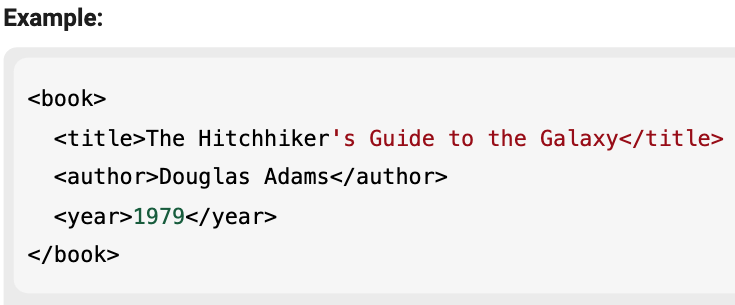

### **Parsing XML with lxml.objectify**
1. parse the file and get a reference to the root node of the XML file with getroot, i.e. ***the document node***
2. If we were describing a book using XML, for example, the root element might be **\<book>** and everything related to that book—like **\<title>**, **\<author>**, and **\<content>**—would be nested within it.

3. The root element essentially provides the overall structure and context for the rest of the information in the XML document.

# **Click here for more information about XML: https://tinyurl.com/3zdf4hab**

In [ ]:
# Import XML library
from lxml import objectify

In [ ]:
# Download and upload Performance_MNR.xml file here: https://tinyurl.com/mwmasnyp
from google.colab import files
files.upload()

Saving Performance_MNR.xml to Performance_MNR.xml


{'Performance_MNR.xml': b'<?xml  version="1.0" encoding="ISO-8859-1"?>\n<PERFORMANCE>\n<INDICATOR>\n  <INDICATOR_SEQ>28445</INDICATOR_SEQ>\n  <PARENT_SEQ></PARENT_SEQ>\n  <AGENCY_NAME>Metro-North Railroad</AGENCY_NAME>\n  <INDICATOR_NAME>On-Time Performance (West of Hudson)</INDICATOR_NAME>\n  <DESCRIPTION>Percent of commuter trains that arrive at their destinations within 5 minutes and 59 seconds of the scheduled time. West of Hudson services include the Pascack Valley and Port Jervis lines. Metro-North Railroad contracts with New Jersey Transit to operate service on these lines.\n</DESCRIPTION>\n  <PERIOD_YEAR>2008</PERIOD_YEAR>\n  <PERIOD_MONTH>1</PERIOD_MONTH>\n  <CATEGORY>Service Indicators</CATEGORY>\n  <FREQUENCY>M</FREQUENCY>\n  <DESIRED_CHANGE>U</DESIRED_CHANGE>\n  <INDICATOR_UNIT>%</INDICATOR_UNIT>\n  <DECIMAL_PLACES>1</DECIMAL_PLACES>\n  <YTD_TARGET>95.00</YTD_TARGET>\n  <YTD_ACTUAL>96.90</YTD_ACTUAL>\n  <MONTHLY_TARGET>95.00</MONTHLY_TARGET>\n  <MONTHLY_ACTUAL>96.90</MONTHL

In [ ]:
# Performance of train services published by The New York Metropolitan Transportation Authority (MTA)
# Get the path of the Performance_MNR.xml file
path = '/content/Performance_MNR.xml'

# parses the contents of the file using objectify.parse()
# parsing -> asking the computer to go through a file, find certain information, and make it ready for us to work with
parsed = objectify.parse(open(path))
root = parsed.getroot()

In [ ]:
# populate a dictionary of tag names to data values
data = [] # Create an empty list

skip_fields = ['PARENT_SEQ', 'INDICATOR_SEQ',
               'DESIRED_CHANGE', 'DECIMAL_PLACES']

# a for loop to access the information
for elt in root.INDICATOR:
    elt_data = {} # Create an empty dictionary
    for child in elt.getchildren():
        if child.tag in skip_fields:
            continue
        elt_data[child.tag] = child.pyval # the 'tag' is the key, the 'pyval' is the value; key-value pair
    data.append(elt_data)

In [ ]:
# Convert the list into a pandas DataFrame
perf = pd.DataFrame(data)
perf

,AGENCY_NAME,INDICATOR_NAME,DESCRIPTION,PERIOD_YEAR,PERIOD_MONTH,CATEGORY,FREQUENCY,INDICATOR_UNIT,YTD_TARGET,YTD_ACTUAL,MONTHLY_TARGET,MONTHLY_ACTUAL
0,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,1,Service Indicators,M,%,95.0,96.9,95.0,96.9
1,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,2,Service Indicators,M,%,95.0,96.0,95.0,95.0
2,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,3,Service Indicators,M,%,95.0,96.3,95.0,96.9
3,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,4,Service Indicators,M,%,95.0,96.8,95.0,98.3
4,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,5,Service Indicators,M,%,95.0,96.6,95.0,95.8
...,...,...,...,...,...,...,...,...,...,...,...,...
643,Metro-North Railroad,Escalator Availability,Percent of the time that escalators are operat...,2011,8,Service Indicators,M,%,97.0,,97.0,
644,Metro-North Railroad,Escalator Availability,Percent of the time that escalators are operat...,2011,9,Service Indicators,M,%,97.0,,97.0,
645,Metro-North Railroad,Escalator Availability,Percent of the time that escalators are operat...,2011,10,Service Indicators,M,%,97.0,,97.0,
646,Metro-North Railroad,Escalator Availability,Percent of the time that escalators are operat...,2011,11,Service Indicators,M,%,97.0,,97.0,


In [ ]:
# Sneak peek of the DataFrame
perf.head()

,AGENCY_NAME,INDICATOR_NAME,DESCRIPTION,PERIOD_YEAR,PERIOD_MONTH,CATEGORY,FREQUENCY,INDICATOR_UNIT,YTD_TARGET,YTD_ACTUAL,MONTHLY_TARGET,MONTHLY_ACTUAL
0,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,1,Service Indicators,M,%,95.0,96.9,95.0,96.9
1,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,2,Service Indicators,M,%,95.0,96.0,95.0,95.0
2,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,3,Service Indicators,M,%,95.0,96.3,95.0,96.9
3,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,4,Service Indicators,M,%,95.0,96.8,95.0,98.3
4,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,5,Service Indicators,M,%,95.0,96.6,95.0,95.8


In [ ]:
# Sneak peek of the DataFrame
perf.tail()

,AGENCY_NAME,INDICATOR_NAME,DESCRIPTION,PERIOD_YEAR,PERIOD_MONTH,CATEGORY,FREQUENCY,INDICATOR_UNIT,YTD_TARGET,YTD_ACTUAL,MONTHLY_TARGET,MONTHLY_ACTUAL
643,Metro-North Railroad,Escalator Availability,Percent of the time that escalators are operat...,2011,8,Service Indicators,M,%,97.0,,97.0,
644,Metro-North Railroad,Escalator Availability,Percent of the time that escalators are operat...,2011,9,Service Indicators,M,%,97.0,,97.0,
645,Metro-North Railroad,Escalator Availability,Percent of the time that escalators are operat...,2011,10,Service Indicators,M,%,97.0,,97.0,
646,Metro-North Railroad,Escalator Availability,Percent of the time that escalators are operat...,2011,11,Service Indicators,M,%,97.0,,97.0,
647,Metro-North Railroad,Escalator Availability,Percent of the time that escalators are operat...,2011,12,Service Indicators,M,%,97.0,,97.0,


In [ ]:
# Complete XML DataFrame
perf2 = pd.read_xml(path)
perf2.head()

,INDICATOR_SEQ,PARENT_SEQ,AGENCY_NAME,INDICATOR_NAME,DESCRIPTION,PERIOD_YEAR,PERIOD_MONTH,CATEGORY,FREQUENCY,DESIRED_CHANGE,INDICATOR_UNIT,DECIMAL_PLACES,YTD_TARGET,YTD_ACTUAL,MONTHLY_TARGET,MONTHLY_ACTUAL
0,28445,NaN,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,1,Service Indicators,M,U,%,1,95.00,96.90,95.00,96.90
1,28445,NaN,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,2,Service Indicators,M,U,%,1,95.00,96.00,95.00,95.00
2,28445,NaN,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,3,Service Indicators,M,U,%,1,95.00,96.30,95.00,96.90
3,28445,NaN,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,4,Service Indicators,M,U,%,1,95.00,96.80,95.00,98.30
4,28445,NaN,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,5,Service Indicators,M,U,%,1,95.00,96.60,95.00,95.80


### **Binary data files**

# Binary file is not human-readable

In [ ]:
# CSV Data Formats
frame = pd.read_csv('/content/ex1.csv')
frame

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


### **Pickle format**
- converting data structures like lists, dictionaries, class instances, and more **into a byte stream** that can be stored in a file or transmitted over a network.

In [ ]:
# Store data in binary format using Python's built-in pickle function
frame.to_pickle('/content/frame_pickle')

In [ ]:
# If you really want to see what the pickle file looked like
!cat /content/frame_pickle

��f      �pandas.core.frame��	DataFrame���)��}�(�_mgr��pandas.core.internals.managers��BlockManager����pandas._libs.internals��_unpickle_block����numpy._core.numeric��_frombuffer���(�`                     	                     
                                                 ��numpy��dtype����i8�����R�(K�<�NNNJ����J����K t�bKK���C�t�R��builtins��slice���K KK��R�K��R�h�numpy._core.multiarray��_reconstruct���h�ndarray���K ��Cb���R�(KKK��h�O8�����R�(K�|�NNNJ����J����K?t�b�]�(�hello��world��foo�et�bhKKK��R�K��R���]�(�pandas.core.indexes.base��
_new_Index���h=�Index���}�(�data�h%h'K ��h)��R�(KK��h/�]�(�a��b��c��d��message�et�b�name�Nu��R�h?�pandas.core.indexes.range��
RangeIndex���}�(hON�start�K �stop�K�step�Ku��R�e��R��_typ��	dataframe��	_metadata�]��attrs�}��_flags�}��allows_duplicate_labels��sub.

In [ ]:
# read pickle files
pd.read_pickle('/content/frame_pickle')

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


### **Parquet format**
- **open-source, column-oriented data storage format** designed for efficient data processing and analytics.
- widely used in big data ecosystems like **Hadoop, Spark, and Hive**, as well as in cloud data warehouses like Amazon Redshift and Google BigQuery

In [ ]:
# Download the Parquet binary file: fec.parquet
# Download data here: https://tinyurl.com/4t56bxjy
from google.colab import files
files.upload()

In [ ]:
# Load the data
fec = pd.read_parquet('/content/fec.parquet')
fec

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,None,None,None,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,None,None,None,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,None,None,None,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,None,None,None,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,None,None,None,SA17A,736166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001726,C00500587,P20003281,"Perry, Rick","GORMAN, CHRIS D. MR.",INFO REQUESTED,XX,99999,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,5000.0,29-SEP-11,REATTRIBUTION / REDESIGNATION REQUESTED (AUTOM...,None,REATTRIBUTION / REDESIGNATION REQUESTED (AUTOM...,SA17A,751678
1001727,C00500587,P20003281,"Perry, Rick","DUFFY, DAVID A. MR.",INFO REQUESTED,XX,99999,DUFFY EQUIPMENT COMPANY INC.,BUSINESS OWNER,2500.0,30-SEP-11,None,None,None,SA17A,751678
1001728,C00500587,P20003281,"Perry, Rick","GRANE, BRYAN F. MR.",INFO REQUESTED,XX,99999,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,500.0,29-SEP-11,None,None,None,SA17A,751678
1001729,C00500587,P20003281,"Perry, Rick","TOLBERT, DARYL MR.",INFO REQUESTED,XX,99999,T.A.C.C.,LONGWALL MAINTENANCE FOREMAN,500.0,30-SEP-11,None,None,None,SA17A,751678


### **Handling Microsoft excel files**

In [ ]:
# Download the ex1.xlsx here: https://tinyurl.com/359uwbk9
xlsx = pd.ExcelFile("https://tinyurl.com/359uwbk9")

In [ ]:
# Getting excel sheet name
xlsx.sheet_names

['Sheet1']

In [ ]:
# Retrieve data by providing sheet name
xlsx.parse(sheet_name = 'Sheet1')

,Unnamed: 0,a,b,c,d,message
0,0,1,2,3,4,hello
1,1,5,6,7,8,world
2,2,9,10,11,12,foo


In [ ]:
# Without index column
xlsx.parse(sheet_name = 'Sheet1', index_col = 0)

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [ ]:
# Another way of reading the ex1.xlsx file
frame = pd.read_excel('https://tinyurl.com/359uwbk9')
frame

,Unnamed: 0,a,b,c,d,message
0,0,1,2,3,4,hello
1,1,5,6,7,8,world
2,2,9,10,11,12,foo


### **To write pandas data to Excel format**


In [ ]:
# Output the frame content
frame

,Unnamed: 0,a,b,c,d,message
0,0,1,2,3,4,hello
1,1,5,6,7,8,world
2,2,9,10,11,12,foo


In [ ]:
# Optimized way to write xlsx file
frame.to_excel("/content/ex2_optimized.xlsx", sheet_name="Dalila", index=False)

### **Interacting with HDF5 files (Hierarchical Data Format version 5)**
1. intended for storing large, complex, and heterogeneous data.
2. widely used in scientific computing, data analysis, and machine learning
3. HDF5 file can **act like a container**, holding various datasets (like tables or arrays) along with their **descriptive metadata**.
4. HDF5 organizes data in a **tree-like structure**, similar to a file system.
    * allows us to **group related datasets and metadata**, making it easier to navigate and access specific information.

### **Visit here for more information about HDF5: https://tinyurl.com/3a4nrskd**




## **HTML vs XML vs HDF5**
- **HDF5**: if we're dealing with **massive scientific datasets** and **need high-performance I/O**
- **XML**: if we're exchanging structured data between applications in a text format
- **HTML**: If we're building a webpage

In [ ]:
# Working with HDF5
# Create some random number
np.random.seed(1213)
frame = pd.DataFrame({"a": np.random.standard_normal(100)})
frame

,a
0,0.511604
1,-0.217660
2,-0.521060
3,1.253270
4,1.104554
...,...
95,-1.691711
96,0.600202
97,0.761825
98,-1.156084


In [ ]:
# Create a HDFStore object
store = pd.HDFStore('/content/mydata.h5')

In [ ]:
# Put the data into the HDF5 file
store["obj1"] = frame

In [ ]:
# Retrieve objects contained in the HDF5 file
store["obj1"]

,a
0,0.511604
1,-0.217660
2,-0.521060
3,1.253270
4,1.104554
...,...
95,-1.691711
96,0.600202
97,0.761825
98,-1.156084


In [ ]:
# HDF5 support query operations in table storage format
store.put('obj2', frame, format = 'table')
print(store.select("obj2", where = ["index >= 1 and index <=4"]))

print('\n -------- \n')

store.select("obj2", where = ["index >= 1 and index <=4"]).mean()

          a
1 -0.217660
2 -0.521060
3  1.253270
4  1.104554

 -------- 



,0
a,0.404776


In [ ]:
# Other HDF functions
# `path_or_buf` -> destination or source of the data
frame.to_hdf(path_or_buf='mydata.hdf5', key='obj3', format='table') # save the data into mydate.hdf5
pd.read_hdf('mydata.hdf5', 'obj3', where = ['index < 5']) # Load the mydate.hdf5 file

,a
0,0.511604
1,-0.217660
2,-0.521060
3,1.253270
4,1.104554


### **Interacting with Web APIs**
1. Web API is a ***System to System interaction***, in which the ***data*** or information from one system ***can be accessed*** by another system, after the completion of execution the output is ***shown to the viewer***.

### ***Task: To find the latest 30 GitHub issues for pandas on GitHub***

In [ ]:
# load library
import requests

In [ ]:
# first get the URL link: https://tinyurl.com/36ttfwsw
url = 'https://tinyurl.com/36ttfwsw'

In [ ]:
# Get the data
resp = requests.get(url)

# **To undestand more on HTTP status, visit this link**: http://tinyurl.com/5cm2yhcw

In [ ]:
# Check for the API status
resp.raise_for_status()
resp

<Response [200]>

In [ ]:
# Return a dictionary containing JSON parsed into native Python objects:
data = resp.json() # This is in json format

In [ ]:
# Get the first data under title
data[0]["title"]

'BUG: raise TypeError when array not like 1D in pandas.array'

In [ ]:
# Pass data directly to DataFrame and extract fields of interest:
issues = pd.DataFrame(data, columns = ['id', 'number', 'title', 'labels', 'state'])
issues

,id,number,title,labels,state
0,3654051088,63173,BUG: raise TypeError when array not like 1D in...,[],open
1,3653426047,63172,PERF: compute kurtosis for ExtensionArray usin...,[],open
2,3653381662,63171,ENH: Make pd.to_datetime with format parameter...,[],open
3,3653081731,63170,BUG: Arrow duration reduction consistency,"[{'id': 76811, 'node_id': 'MDU6TGFiZWw3NjgxMQ=...",open
4,3652855864,63169,BUG: Index.intersection returns reference inst...,"[{'id': 76811, 'node_id': 'MDU6TGFiZWw3NjgxMQ=...",open
...,...,...,...,...,...
25,3639216145,63145,"DOC: Add ""Loading data in Google Colab"" sectio...",[],open
26,3638902719,63144,DOC: Incorrect typing in `astype` for the `cop...,"[{'id': 134699, 'node_id': 'MDU6TGFiZWwxMzQ2OT...",open
27,3638138676,63143,BUG: fix polluted window in rolling kurt,[],open
28,3637512375,63142,EHN: Adding prefix support for pd.merge,[],open


### **Interacting with Databases - SQL**





In [ ]:
# SQL
import sqlite3

In [ ]:
# Connect to a SQLite3 database using a 'with' statement for automatic resource management
# This ensures the connection is properly closed even if errors occur.
with sqlite3.connect('/content/mydata.sqlite') as con:
    # Create the SQL query for table creation
    query = """
    CREATE TABLE IF NOT EXISTS test
    (a VARCHAR(20), b VARCHAR(20),
    c REAL, d INTEGER
    );"""

    # Execute the table creation query and commit the changes
    con.execute(query)
    con.commit()

    # Create some data to insert
    data = [("Atlanta", "Georgia", 1.25, 6),
            ("Bangi", "Jalan Reko", 3.3, 5),
            ("Seremban", "Nilai", 5.5, 89)]

    # Create a query statement for inserting data
    # sqlite3 module will replace each ? with a corresponding value from a Python sequence (like a tuple or list)
    stmt = "INSERT INTO test VALUES(?, ?, ?, ?)"

    # Execute the insert statement for multiple rows and commit the changes
    # 'executemany' is efficient for inserting multiple records
    con.executemany(stmt, data)
    con.commit()

    # Select all data from the 'test' table
    cursor = con.execute('select * from test')

    # Fetch all the results
    rows = cursor.fetchall()

# Print rows to see the fetched data after the 'with' block is exited
rows

[('Atlanta', 'Georgia', 1.25, 6),
 ('Bangi', 'Jalan Reko', 3.3, 5),
 ('Seremban', 'Nilai', 5.5, 89)]

# **Done for the day!!!**